# Shortest path data generator

Generate trajectories from (1,1) to (10,10) with shortest path. 
Generate total_trajectories number of trajectories and save the trajectories into data.txt.
Each location is mapped to a unique number (x-1)*may(y)+y and the mapping is saved to codebook.txt

## 1. Generate trajectories for training

simulation 0 saved
simulation 1 saved
simulation 2 saved
simulation 3 saved
simulation 4 saved
simulation 5 saved
simulation 6 saved
simulation 7 saved
simulation 8 saved
simulation 9 saved
simulation 10 saved
simulation 11 saved
simulation 12 saved
simulation 13 saved
simulation 14 saved
simulation 15 saved
simulation 16 saved
simulation 17 saved
simulation 18 saved
simulation 19 saved
simulation 20 saved
simulation 21 saved
simulation 22 saved
simulation 23 saved
simulation 24 saved
simulation 25 saved
simulation 26 saved
simulation 27 saved
simulation 28 saved
simulation 29 saved
simulation 30 saved
simulation 31 saved
simulation 32 saved
simulation 33 saved
simulation 34 saved
simulation 35 saved
simulation 36 saved
simulation 37 saved
simulation 38 saved
simulation 39 saved
simulation 40 saved
simulation 41 saved
simulation 42 saved
simulation 43 saved
simulation 44 saved
simulation 45 saved
simulation 46 saved
simulation 47 saved
simulation 48 saved
simulation 49 saved
simulation

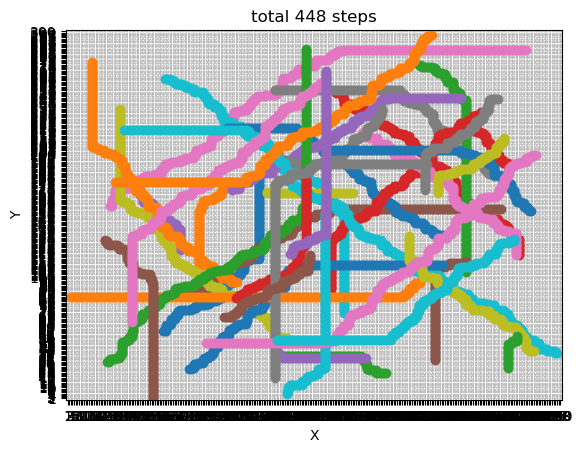

In [1]:
# random simulation time
simulation_num = 400
# Define the grid size
grid_size = 300
# Define the total number of trajectories
total_trajectories = 40
# trajectory training data option: 
# 0: from (1,1) to (10,10) * 100 trajectories
# 1: from (1,1) to (10,10) * 50 trajectories, from (1,10) to (10,1) * 50 trajectories
# 2: random OD
trajectory_option = 2
random_start_scale = 5

import numpy as np
import matplotlib.pyplot as plt
import copy

# trajectory：[[x_0,y_0,s_0,d_x,d_y],[x_1,y_1,s_1],...], s means the stay time left on current point, if s<0,means the car is not on the grid
# direction : [d_x, d_y], means the moving direction

# generate_trajectory(): generate evary trajector
# update_position(): if stay=0, move to next point, update the grid capacity (car number on each point)
# update_stay(): if chek whether the new trajectory has to stay for stay_time

def get_capacity(trajectory_list, grid_size=10):
    # trajectory_list: [trajectory1, trajectory2,...], trajectory1 = [state_1,state2,...], state_1 = [x,y,s]
    grid_capacity = np.zeros([grid_size,grid_size],dtype= int)
    for trajectory in trajectory_list:
        current_state = trajectory[-1]
        if current_state[0] != 0 and current_state[0] != grid_size+1: # not on buffer point
            grid_capacity[current_state[0]-1,current_state[1]-1] +=1
    return grid_capacity

def update_postion(currnet_state, start_point, end_point, direction = [1,1], grid_size=10):
    # at first time, put all cars on (0,0), stay time = - t
    # then check if the stat time reach 0, move to start point
    # when a car get end point, put it on (gridsize+1,gridsize+1), stay time = - 1
    # trajectory: [T-1,3]
    # currnet_state = trajectory[-1]
    # grid_capacity: [grid_size,grid_size]

    if currnet_state[0]==0 and currnet_state[1]==0 and currnet_state[2] <0:
        # didn't start
        next_point = copy.deepcopy(currnet_state)
        next_point[2] += 1

    elif currnet_state[0]==0 and currnet_state[1]==0 and currnet_state[2] >=0:
        # start
        next_point = copy.deepcopy(currnet_state)
        next_point[0] = start_point[0]
        next_point[1] = start_point[1]

    elif currnet_state[0]==end_point[0] and currnet_state[1]==end_point[1]:
        # end
        next_point = copy.deepcopy(currnet_state)
        next_point[0] = grid_size+1
        next_point[1] = grid_size+1
        next_point[2] = -1

    elif currnet_state[0]==grid_size+1 and currnet_state[1]==grid_size+1:
        # already end
        next_point = copy.deepcopy(currnet_state)

    elif currnet_state[2] >0:
        # stay at this point and stay time -1
        next_point = copy.deepcopy(currnet_state)
        next_point[2] -= 1

    # stay_time = 0, move to next point
    elif currnet_state[0]==end_point[0]:
        # x is on boundary, move y
        next_point = copy.deepcopy(currnet_state)
        next_point[1] += direction[1]

    elif currnet_state[1]==end_point[1]:
        # y is on boundary, move x
        next_point = copy.deepcopy(currnet_state)
        next_point[0] += direction[0]
    else:
        # point inside, move randomly
        if np.random.rand() <0.5:
            next_point = copy.deepcopy(currnet_state)
            next_point[1] += direction[1]
        else:
            next_point = copy.deepcopy(currnet_state)
            next_point[0] += direction[0]

    # trajectory.append(next_point)
    return next_point


def update_stay(former_point, current_point, grid_capacity):
    # trajectory: [T,3]
    # former_point = trajectory[-2]
    # current_point = trajectory[-1]

    if former_point[2] ==0 and current_point[2]==0: # didn't stay, or stayed until stay=0 and moved to current point
        current_point[2] = grid_capacity[current_point[0]-1,current_point[1]-1]-1 # 1 car means no stay time, 2 car means stay for 1 time,...
    return current_point


def initialize_start(grid_size=10, trajectory_option = 0,trajectory_num = 10):
    # define start points, directions

    start_points = np.zeros([trajectory_num,2],dtype= int)
    end_points = np.zeros([trajectory_num,2],dtype= int)
    directions = np.zeros([trajectory_num,2],dtype= int)
    
    if trajectory_option == 0:
        start_points[:,0] = 1
        start_points[:,1] = 1
        end_points[:,0] = 10
        end_points[:,1] = 10
        directions[:,0] = 1
        directions[:,1] = 1

    elif trajectory_option == 1:
        start_points[:trajectory_num//2,0] = 1
        start_points[trajectory_num//2:,0] = 1
        start_points[:trajectory_num//2,1] = 1
        start_points[trajectory_num//2:,1] = grid_size
        end_points[:trajectory_num//2,0] = grid_size
        end_points[trajectory_num//2:,0] = grid_size
        end_points[:trajectory_num//2,1] = grid_size
        end_points[trajectory_num//2:,1] = 1
        directions[:trajectory_num//2,0] = 1
        directions[trajectory_num//2:,0] = 1
        directions[:trajectory_num//2,1] = 1
        directions[trajectory_num//2:,1] = -1

    elif trajectory_option == 2:
        start_points[:,0] = np.random.randint(1,grid_size+1,trajectory_num)
        start_points[:,1] = np.random.randint(1,grid_size+1,trajectory_num)
        end_points[:,0] = np.random.randint(1,grid_size+1,trajectory_num)
        end_points[:,1] = np.random.randint(1,grid_size+1,trajectory_num)
        while (start_points == end_points).any():
            idx = np.where(start_points == end_points)
            end_points[idx[0],idx[1]] = np.random.randint(1,grid_size+1,len(idx[0]))
        directions = ((end_points - start_points)/np.abs(end_points - start_points)).astype(int)

    return start_points, end_points, directions


def generate_trajectory_list(grid_size=10, trajectory_option = 0,trajectory_num = 10, random_start_scale = 1):
    # random_start_scale: the scale of random start time, 1 means start at the same time, other value will be random

    start_points, end_points, directions = initialize_start(grid_size, trajectory_option,trajectory_num)

    # initialize cars
    trajectory_list = []
    # trajectory_list = [trajectory1, trajectory2,...], trajectory1 = [state_1,state2,...], state_1 = [x,y,s]

    for i in range(trajectory_num):
        start_time = -np.random.randint(0,random_start_scale)
        trajectory_list.append([[0,0,start_time]])
    
    while (1): # not all cars get to the end points
        # print([[trajectory[-1][0],trajectory[-1][1],trajectory[-1][2]] for trajectory in trajectory_list])
        if all([trajectory[-1][0]==grid_size+1 and trajectory[-1][1]==grid_size+1 for trajectory in trajectory_list]):
            break
        # move
        for i in range(trajectory_num):
            current_point = trajectory_list[i][-1]
            direction = directions[i]
            start_point = start_points[i]
            end_point = end_points[i]
            next_point = update_postion(current_point, start_point, end_point, direction, grid_size)
            trajectory_list[i].append(next_point)
        # update stay
        grid_capacity = get_capacity(trajectory_list, grid_size)
        for i in range(trajectory_num):
            former_point = trajectory_list[i][-2]
            current_point = trajectory_list[i][-1]
            current_point = update_stay(former_point, current_point, grid_capacity)
            trajectory_list[i][-1] = current_point

    return trajectory_list

# Generate the codebook
codebook = {}
max_value = grid_size  # max(y) = 10 in this case

# Populate the codebook with grid cells
for x in range(1, grid_size + 1):
    for y in range(1, grid_size + 1):
        code = (x - 1) * max_value + y
        codebook[(x, y)] = str(code)
codebook[(0,0)] = f'{grid_size*grid_size+1}'
codebook[(grid_size+1,grid_size+1)] = f'{grid_size*grid_size+2}'

# Save the codebook to a file
with open('./data/codebook.txt', 'w') as file:
    for key, value in codebook.items():
        file.write(f'{key}: {value}\n')

#simulation for 10 times
for t in range(simulation_num):
    # print(f'simulation {t}')
    # Generate and save 10 trajectories
    all_encoded_trajectories = []
    trajectory_list = generate_trajectory_list(grid_size, trajectory_option, total_trajectories, random_start_scale)

    for i in range(total_trajectories):
        trajectory = trajectory_list[i]
        encoded_trajectory = [codebook[(x, y)] for x, y, s in trajectory]
        # # Append '0' at the end of each trajectory
        # encoded_trajectory.append('0')
        all_encoded_trajectories.append(encoded_trajectory)


    # Save all trajectories to a single file
    with open(f'./data/simulation_{t}.txt', 'w') as file:
        # file.write(' '.join(all_encoded_trajectories))
        for trajectory in all_encoded_trajectories:
            file.write(' '.join(trajectory))
            file.write('\n')
    print(f'simulation {t} saved')

# # print trajectory
# for i in range(total_trajectories):
#     print(f'trajectory {i+1}')
#     print(trajectory_list[i])

# Plotting the trajectory
for i in range(total_trajectories):
    trajectory = []
    for j in range(len(trajectory_list[i])):
        x, y, s = trajectory_list[i][j]
        if x == 0 and y == 0:
            continue
        elif x == grid_size + 1 and y == grid_size + 1:
            break
        trajectory.append((x, y, s))
    trajectory_x, trajectory_y,trajectory_s = zip(*trajectory)
    plt.plot(trajectory_x, trajectory_y, marker='o', label=f'Trajectory {i+1}')

# Plot configuration
plt.xlim(0, grid_size + 1)
plt.ylim(0, grid_size + 1)
plt.xticks(np.arange(1, grid_size + 1, 1))
plt.yticks(np.arange(1, grid_size + 1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'total {len(trajectory_list[-1])} steps')
plt.show()


## 3. Models

In [14]:
# Part 1. Define Functions
import torch
import torch.nn as nn
from torch.nn import functional as F

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, n_embd, head_size, block_size, dropout):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,N,C = x.shape
        k = self.key(x)   # (B,T,N,C)
        q = self.query(x) # (B,T,N,C)
        # compute time attention
        wei_T = q.permute(0,2,1,3) @ k.permute(0,2,3,1) # (B,N,T,C) @ (B,N,C,T) -> (B,N,T,T)
        wei_T = wei_T / (C ** 0.5)
        wei_T = F.softmax(wei_T, dim=-1)
        # compute spatial attention
        wei_N = q @ k.permute(0,1,3,2) # (B,T,N,C) @ (B,T,N,C) -> (B,T,N,N)
        wei_N = wei_N / (C ** 0.5)
        wei_N = F.softmax(wei_N, dim=-1)

        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,N,C)
        out = wei_T @ v.permute(0,2,1,3) # (B,N,T,T) @ (B,N,T,C) -> (B,N,T,C)
        out = out.permute(0,2,1,3) # (B,T,N,C)
        out = wei_N @ out # (B,T,N,N) @ (B,T,N,C) -> (B,T,N,C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, n_head, head_size, n_embd, block_size, dropout):
        super().__init__()
        self.heads = nn.ModuleList([Head(n_embd, head_size, block_size, dropout) for _ in range(n_head)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd, dropout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head, block_size, dropout):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size, n_embd, block_size, dropout)
        self.ffwd = FeedFoward(n_embd, dropout)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size, n_embd, n_layer, n_head, block_size, dropout):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.block_size = block_size
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        # for attention
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head, block_size, dropout) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None, OD = None):
        B, T, N = idx.shape # 8, 50, 100
        device = idx.device

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,N,C)
        pos_emb = self.position_embedding_table(torch.arange(T).to(device)) # (T,C)
        pos_emb = pos_emb.unsqueeze(0) # (1,T,C)
        pos_emb = pos_emb.expand(N, -1, -1) # (N,T,C)
        pos_emb = pos_emb.permute(1, 0, 2) # (T,N,C)
        if OD is None:
            x = tok_emb + pos_emb # (B,T,N,C)
            x = self.blocks(x) # (B,T,N,C)
            x = self.ln_f(x) # (B,T,N,C)
            logits = self.lm_head(x) # (B,T,N,vocab_size)
        else:
            #OD : (B,2,N)
            OD_emb = self.token_embedding_table(OD) # (B,2,N,C)
            x = tok_emb + pos_emb # (B,T,N,C)
            x = torch.concatenate([OD_emb[:,[0],:,:], x, OD_emb[:,[1],:,:]], dim=1) # (B,T+2,N,C)
            x = self.blocks(x) # (B,T+2,N,C)
            x = self.ln_f(x) # (B,T+2,N,C)
            x = x[:,1:-1,:] # (B,T,N,C)
            logits = self.lm_head(x) # (B,T,N,vocab_size)
            

        if targets is None:
            loss = None
        else:
            B, T, N, C = logits.shape
            logits = logits.view(B*T*N, C)
            targets = targets.view(B*T*N)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, OD, max_new_tokens):
        # idx is (B, T, N) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -self.block_size:, :]
            # get the predictions
            logits, loss = self(idx_cond, OD = OD)
            # focus only on the last time step
            logits = logits[:, -1, :, :] # becomes (B, N, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, N, C)
            # sample from the distribution 
            idx_next = torch.zeros([probs.shape[0], 1, probs.shape[1]]).to(probs.device) # (B,1, N)
            for n in range(probs.shape[1]):
                idx_next[:,0,n] = torch.multinomial(probs[:,n,:], num_samples=1).squeeze(1) # (B, N, 1)
            # idx_next = torch.multinomial(probs, num_samples=1) # (B, N, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next.type_as(idx)), dim=1) # (B, T+1, N)
        return idx


class BigramLanguageModelWithoutAttention(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            # pytorch takes B, C, T
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens, OD = None):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx, OD = OD)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx


## 3. Train the model

In [15]:

# HERE SELECTING WHETHER TO USE ATTENTION
use_attention = True
use_OD = True
# Interations for training model
max_iters = 5000

# hyperparameters
batch_size = 8 # how many independent sequences will we process in parallel?
block_size = 10 # what is the maximum context length for predictions?
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 16
n_layer = 128
dropout = 0.1
# ------------


# Function to read the encoded data from a file and save it as a list of integers
def read_encoded_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            trajectory = line.strip().split()
            trajectory = [int(code) for code in trajectory]
            data.append(trajectory)
    # data: NxT
    data = torch.tensor(data)
    # transpose data to T x N
    data = data.t()
    # n = int(0.9*len(data)) # first 90% will be train, rest val
    # train_data = data[:n]
    # val_data = data[n:]
    # return train_data, val_data
    return data

def generate_new_data(grid_size=10, trajectory_option = 0,trajectory_num = 10, random_start_scale = 1):
    trajectory_list = generate_trajectory_list(grid_size, trajectory_option,trajectory_num, random_start_scale= random_start_scale) # N T 3
    data = []
    for i in range(trajectory_num):
        trajectory = trajectory_list[i]
        encoded_trajectory = [int(codebook[(x, y)]) for x, y, s in trajectory]
        data.append(encoded_trajectory)
    data = torch.tensor(data)
    data = data.t()
    return data

def get_OD(encoded_data):
    # data: T x N
    OD = torch.zeros([2,encoded_data.shape[1]],dtype=int).to(encoded_data.device)
    for i in range(1,len(encoded_data)):
        for j in range(len(encoded_data[i])):
            if encoded_data[i-1,j] == grid_size*grid_size+1 and encoded_data[i,j] != grid_size*grid_size+1:
                # put on to start point
                OD[0,j] = encoded_data[i,j]
            if encoded_data[i-1,j] != grid_size*grid_size+2 and encoded_data[i,j] == grid_size*grid_size+2:
                # put on to end point
                OD[1,j] = encoded_data[i-1,j]
    return OD
    
# data loading
def get_batch(data_list, block_size, batch_size, OD_list = None):
    # generate a small batch of data of inputs x and targets y
    x = []
    y = []
    od = [] if OD_list is not None else None
    for i in range(batch_size):
        idx = torch.randint(len(data_list),(1,))
        data = data_list[idx] # T N
        if OD_list is not None:
            od.append(OD_list[idx])
        start_index = torch.randint(len(data) - block_size, (1,))
        x.append(data[start_index:start_index+block_size])
        y.append(data[start_index+1:start_index+block_size+1])
    x = torch.stack(x)
    y = torch.stack(y)
    od = torch.stack(od) if OD_list is not None else None
    x, y = x.to(device), y.to(device)
    return x, y, od

@torch.no_grad()
def estimate_loss(model, train_data_list, valid_data_list, block_size, batch_size, eval_iters=200, train_OD_list = None, valid_OD_list = None):
    out = {}
    model.eval()
    losses = torch.zeros(eval_iters)
    for k in range(eval_iters):
        X, Y, OD = get_batch(train_data_list,block_size, batch_size, train_OD_list)
        logits, loss = model(X, Y, OD)
        losses[k] = loss.item()
    out['train'] = losses.mean()
    losses = torch.zeros(eval_iters)
    if valid_data_list is not None:
        for k in range(eval_iters):
            X, Y, OD = get_batch(valid_data_list, block_size, batch_size, valid_OD_list)
            logits, loss = model(X, Y, OD)
            losses[k] = loss.item()
        out['val'] = losses.mean()
    model.train()
    return out

# torch.manual_seed(1337)

train_data_list = []
train_OD_list = []
valid_data_list = []
valid_OD_list = []
for i in range(simulation_num):
    train_data = read_encoded_data(f'./data/simulation_{i}.txt')
    train_data = train_data.to(device) # T x N
    train_OD = get_OD(train_data)
    train_data = train_data -1 # 0-indexing
    train_OD = train_OD -1 # 0-indexing
    train_data_list.append(train_data)
    train_OD_list.append(train_OD)
valid_data = generate_new_data(grid_size, trajectory_option, total_trajectories, random_start_scale)
valid_data = valid_data.to(device)
valid_OD = get_OD(valid_data)
valid_data = valid_data -1 # 0-indexing
valid_OD = valid_OD -1 # 0-indexing
valid_data_list.append(valid_data)
valid_OD_list.append(valid_OD)
if not use_OD:
    train_OD_list = None
    valid_OD_list = None

# Count the number of unique integers
unique_integers = set(train_data.flatten().tolist()) # if grid_size = 10, [1 - 10*10+2]
# embedding table is vocab*vocab, every integer needs to map to a row in the embedding table
vocab_size = max(unique_integers)+1 # 1-indexing, range (0,10*10+2) -> (0,10*10+2]=(0,10*10+2+1)




if use_attention:
    model = BigramLanguageModel(vocab_size, n_embd, n_layer, n_head, block_size, dropout)
else:    
    model = BigramLanguageModelWithoutAttention(vocab_size)

    
model = model.to(device)
model.train()
# print the number of parameters in the model
print(sum(p.numel() for p in model.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):
    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(model, train_data_list, valid_data_list, block_size, batch_size, eval_iters=eval_iters, train_OD_list = train_OD_list, valid_OD_list = valid_OD_list)
        if valid_data_list is not None:
            print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        else:
            print(f"step {iter}: train loss {losses['train']:.4f}")

    # sample a batch of data
    xb, yb, odb = get_batch(train_data_list, block_size, batch_size, train_OD_list)

    # evaluate the loss
    logits, loss = model(xb, yb, odb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

6.387302 M parameters
step 0: train loss 4.6232, val loss 4.6180
step 100: train loss 2.0420, val loss 1.7653
step 200: train loss 1.2668, val loss 1.0922
step 300: train loss 1.1450, val loss 1.0398
step 400: train loss 1.0934, val loss 0.9616
step 500: train loss 1.0925, val loss 0.9943
step 600: train loss 1.0480, val loss 0.9359
step 700: train loss 0.9962, val loss 0.8981
step 800: train loss 0.9155, val loss 0.8577
step 900: train loss 0.7718, val loss 0.6987
step 1000: train loss 0.6497, val loss 0.5762
step 1100: train loss 0.5428, val loss 0.5370
step 1200: train loss 0.4584, val loss 0.4373
step 1300: train loss 0.4239, val loss 0.4185
step 1400: train loss 0.3765, val loss 0.3999
step 1500: train loss 0.3509, val loss 0.3686
step 1600: train loss 0.3328, val loss 0.3489
step 1700: train loss 0.3204, val loss 0.3332
step 1800: train loss 0.3137, val loss 0.3181
step 1900: train loss 0.3113, val loss 0.3393
step 2000: train loss 0.2968, val loss 0.3258
step 2100: train loss 0.

## 4. Generate the trajectory from the model

In [1]:
max_new_tokens = 60
context = train_data[:block_size].unsqueeze(0) # 1 T N, 0-indexing
if use_OD:
    OD = valid_OD.unsqueeze(0) # 1 2 N, 0-indexing
else:
    OD = None

context = valid_data[:block_size].unsqueeze(0) # 1 T N, 0-indexing
if use_OD:
    OD = valid_OD.unsqueeze(0) # 1 2 N, 0-indexing
else:
    OD = None
# print(OD)
# print(context)
    
model=model.eval()
generated_traj = model.generate(context, max_new_tokens=max_new_tokens, OD = OD)[0] #T N, 160 100
generated_traj = generated_traj.t().tolist() # N T, 100 160


# Function to read the codebook from a file
def read_decodebook(filename):
    decodebook = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(': ', 1)  # Split at the first colon
            key = eval(parts[0])  # Evaluate the key part
            value = parts[1]  # Use the value part
            decodebook[int(value)] = key
    return decodebook

# Function to decode the data from a file using the codebook
def decode_data(generated_traj, decodebook):
    decoded_trajectories = []
    for trajectory in generated_traj:
        trajectory = [decodebook[code+1] for code in trajectory] # model 0-indexing, codebook 1-indexing
        decoded_trajectories.append(trajectory)
            
    return decoded_trajectories

def check_stay(decoded_trajectories):
    # trajectory: [N,T,2]
    # check if the trajectory follows the stay rule
    check_result = np.ones([len(decoded_trajectories),len(decoded_trajectories[0])],dtype = int) # [N, T]
    stay_time = np.zeros([total_trajectories],dtype= int) # former, current stay time
    for i in range(len(decoded_trajectories[0])): # [1:T-1]
        grid_capacity = np.zeros([grid_size,grid_size],dtype= int)
        for j in range(len(decoded_trajectories)): # N
            if decoded_trajectories[j][i] != (0,0) and decoded_trajectories[j][i] != (grid_size+1,grid_size+1):
                # print(decoded_trajectories[j][i],decoded_trajectories[j][i] == [0,0])
                grid_capacity[decoded_trajectories[j][i][0]-1,decoded_trajectories[j][i][1]-1] +=1
        for j in range(len(decoded_trajectories)):
            if decoded_trajectories[j][i] == (0,0) or decoded_trajectories[j][i] == (grid_size+1,grid_size+1): # not on grid
                continue
            if decoded_trajectories[j][i] == decoded_trajectories[j][i-1]: # didn't move
                if stay_time[j] == 0: # should move but didn't
                    check_result[j,i] = 0
                else: # shouldn't move and didn't
                    stay_time[j] -=1
            else: # moved
                if stay_time[j] == 0: # should move and moved, new stay time
                    stay_time[j] = grid_capacity[decoded_trajectories[j][i][0]-1,decoded_trajectories[j][i][1]-1]-1
                else: # shouldn't move but moved
                    check_result[j,i] = 0
                    stay_time[j] = grid_capacity[decoded_trajectories[j][i][0]-1,decoded_trajectories[j][i][1]-1]-1
    return check_result # N T


# Read the codebook
decodebook = read_decodebook('./data/codebook.txt')

# Decode the data
# print(len(generated_traj))
# for trajectory in generated_traj:
#     print(trajectory)
decoded_trajectories = decode_data(generated_traj, decodebook)

# delete tail
while(1):
    if all([trajectory[-2] == (grid_size+1,grid_size+1) for trajectory in decoded_trajectories]):
        for i in range(len(decoded_trajectories)):
            decoded_trajectories[i].pop()
    else:
        break

check_result = check_stay(decoded_trajectories)

# Print the decoded trajectories
for i, trajectory in enumerate(decoded_trajectories):
    RED = '\033[31m'
    GREEN = '\033[32m'
    RESET = '\033[0m'  # 用于重置颜色，以免影响后续文本
    text = f'Trajectory {i+1:<2}:'
    text += f'OD: from {str(decodebook[int(OD[0,0,i])+1]):<8} to {str(decodebook[int(OD[0,1,i])+1]):<8}, '
    text += f'Total stay time: {len(trajectory)}, Wrong stay time: {len(trajectory)-np.sum(check_result[i]):<2}: '
    for j, point in enumerate(trajectory):
        if check_result[i,j] == 1:
            text += f'{RESET} {str(point):<8}'
        else:
            text += f'{RED} {str(point):<8}'
    print(text)

# for i in range(valid_data.shape[1]):
#     trajectory = valid_data[:,i].tolist()
#     decoded_trajectory = decode_data([trajectory], decodebook)[0]
#     print(f'Valid Trajectory {i+1}: {decoded_trajectory}')



NameError: name 'train_data' is not defined

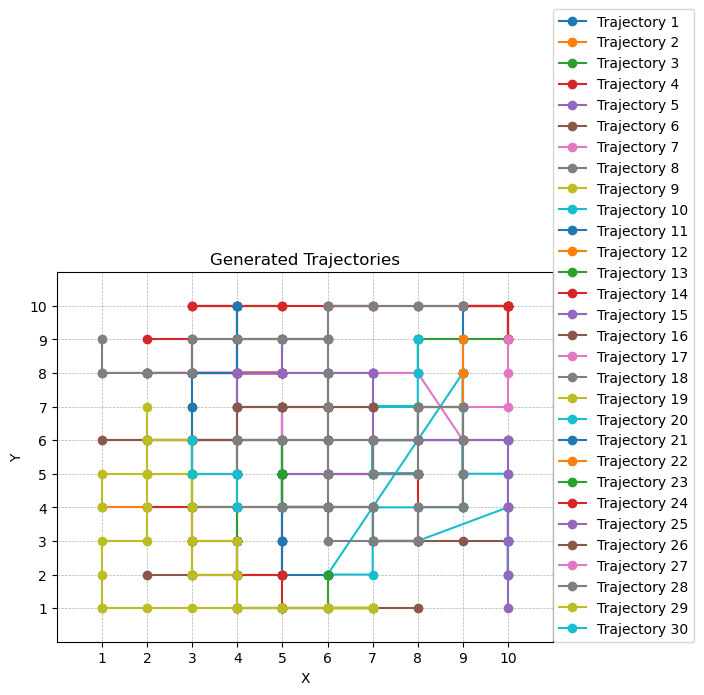

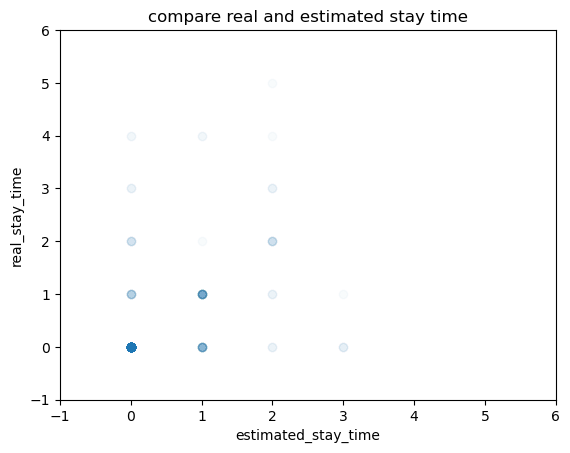

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def truncate_trajectory(decoded_trajectories, end_index_list):
    for i in range(len(decoded_trajectories)):
        for j in range(len(decoded_trajectories[i])):
            if decoded_trajectories[i][j] == end_index_list[i]:
                decoded_trajectories[i] = decoded_trajectories[i][:j+1]
                break
    return decoded_trajectories
    

def plot_trajectories(decoded_trajectories, trajectory_index=None):
 #   plt.figure(figsize=(8, 8))

    # Plot configuration
    grid_size = 10
    plt.xlim(0, grid_size + 1)
    plt.ylim(0, grid_size + 1)
    plt.xticks(np.arange(1, grid_size + 1, 1))
    plt.yticks(np.arange(1, grid_size + 1, 1))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Generated Trajectories')

    # Plot the specified trajectory or all trajectories
    if trajectory_index is not None:
        trajectory = []
        trajectory_ = decoded_trajectories[trajectory_index]
        for j in range(len(trajectory_)):
            if trajectory_[j] != (0, 0) and trajectory_[j] != (grid_size + 1, grid_size + 1):
                trajectory.append(trajectory_[j])

        x = [point[0] for point in trajectory]
        y = [point[1] for point in trajectory]
        plt.plot(x, y, marker='o', label=f'Trajectory {trajectory_index + 1}')
    else:
        for i, trajectory_ in enumerate(decoded_trajectories):
            trajectory = []
            for j in range(len(trajectory_)):
                if trajectory_[j] != (0, 0) and trajectory_[j] != (grid_size + 1, grid_size + 1):
                    trajectory.append(trajectory_[j])
            x = [point[0] for point in trajectory]
            y = [point[1] for point in trajectory]
            plt.plot(x, y, marker='o', label=f'Trajectory {i+1}')

    num1 = 1
    num2 = 0
    num3 = 3
    num4 = 0
    plt.legend(bbox_to_anchor=(num1, num2), loc=num3, borderaxespad=num4)
    plt.show()

def compare_estimated_real_stay_time(decoded_trajectories):
    # trajectory: [N,T,2]
    # check if the trajectory follows the stay rule
    estimated_stay_time = []
    real_stay_time = []
    grid_capaticy = np.zeros([len(decoded_trajectories[0]),grid_size,grid_size],dtype= int) # [T,N,N]
    for i in range(len(decoded_trajectories[0])):
        for j in range(len(decoded_trajectories)):
            if decoded_trajectories[j][i] != (0,0) and decoded_trajectories[j][i] != (grid_size+1,grid_size+1):
                grid_capaticy[i,decoded_trajectories[j][i][0]-1,decoded_trajectories[j][i][1]-1] +=1
    for j in range(len(decoded_trajectories)):
        estimated = []
        real = []
        stay_time = 0
        for i in range(1,len(decoded_trajectories[j])):
            if decoded_trajectories[j][i] == (grid_size+1, grid_size+1): # finish
                break
            elif decoded_trajectories[j][i] == (0, 0): # start
                continue

            if decoded_trajectories[j][i] != decoded_trajectories[j][i-1]: # move to a new point
                estimated.append(grid_capaticy[i,decoded_trajectories[j][i][0]-1,decoded_trajectories[j][i][1]-1]-1)
                real.append(stay_time)
                stay_time = 0
            else:
                stay_time +=1
        real.pop(0) # first point doesn't have stay time
        estimated.pop(-1)
        estimated_stay_time.append(estimated)
        real_stay_time.append(real)
    # for i in range(len(decoded_trajectories)):
    #     print(estimated_stay_time[i])
    #     print(real_stay_time[i])

    # plot compare figure
    # plt.figure(figsize=(8, 8))
    plot_data = []
    for i in range(len(estimated_stay_time)):
        for j in range(len(estimated_stay_time[i])):
            plot_data.append([estimated_stay_time[i][j], real_stay_time[i][j]])
    plot_data = np.array(plot_data) # T_ 2

    plt.xlim(-1, np.max(plot_data)+1)
    plt.ylim(-1, np.max(plot_data)+1)
    # plt.xticks(np.arange(1, grid_size + 1, 1))
    # plt.yticks(np.arange(1, grid_size + 1, 1))
    plt.scatter(plot_data[:,0], plot_data[:,1], marker='o',alpha=10/len(plot_data))
    plt.xlabel('estimated_stay_time')
    plt.ylabel('real_stay_time')
    plt.title('compare real and estimated stay time')
    plt.show()
    return estimated_stay_time, real_stay_time



trajectory_index = -1
end_index_list = train_data[-1, :].tolist() # T N -> N
end_index_list = [decodebook[code+1] for code in end_index_list]
# decoded_trajectories =  truncate_trajectory(decoded_trajectories, end_index_list)

if trajectory_index == -1:
    # Plot all trajectories
    plot_trajectories(decoded_trajectories)
    compare_estimated_real_stay_time(decoded_trajectories)
else:
    #trajectory_index = random.randint(0, len(decoded_trajectories) - 1)
    # Plot a specific trajectory (e.g., the first trajectory, index 0)
    plot_trajectories(decoded_trajectories, trajectory_index)
